In [2]:
import pandas as pd

In [3]:
check= pd.read_csv('image_table.csv')

In [6]:
check.groupby('name').count().sort_values('page_image')

,page_image,title,page_link
name,,,
교환학생,1,1,1
다름이 아니라,1,1,1
시에라,1,1,1
길티액스,1,1,1
약초마을 연쇄살초사건,1,1,1
...,...,...,...
사상최강,20,20,20
사막에 핀 달,20,20,20
사람의 조각,20,20,20


<AxesSubplot:ylabel='Frequency'>

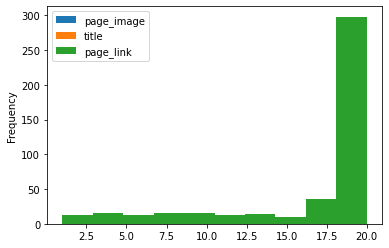

In [9]:
check.groupby('name').count().plot.hist()

In [19]:
checklist= check.groupby('name').count()['title'].loc[check.groupby('name').count()['title']<20].index.values

In [20]:
len(checklist)

154

In [21]:
i=0

In [30]:
check.loc[check['name']==checklist[i]]


,name,page_image,title,page_link
788,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,8화 : 함께 할 수 있어요,https://comic.naver.com/webtoon/detail?titleId...
789,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,7화 : 이게 왜 여기서 나와?,https://comic.naver.com/webtoon/detail?titleId...
790,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,"6화 : 일상생활, 문제없어",https://comic.naver.com/webtoon/detail?titleId...
791,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,5화 : 익명+무료,https://comic.naver.com/webtoon/detail?titleId...
792,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,4화 : 다 내 얘기 같아,https://comic.naver.com/webtoon/detail?titleId...
793,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,3화 : 부끄러워 할 필요 없지,https://comic.naver.com/webtoon/detail?titleId...
794,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,2화 : 미리미리 준비의 중요성,https://comic.naver.com/webtoon/detail?titleId...
795,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,1화 : 당연한데도 어렵다고 생각하는 것,https://comic.naver.com/webtoon/detail?titleId...
796,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,건강한 부부생활 4화,https://comic.naver.com/webtoon/detail?titleId...
797,ㅋㄷㅋㄷ만화,https://shared-comic.pstatic.net/thumb/webtoon...,건강한 부부생활 2화,https://comic.naver.com/webtoon/detail?titleId...


In [31]:
i+=1

In [1]:
# 154개 언제 다보냐 그냥 새로 가져오자
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [5]:
order = pd.read_csv('./order_table.csv')[['name', 'link']]

In [13]:
# 2일 연재, 3일연재 중복제거
order.drop_duplicates('name', inplace=True)

In [15]:
order.link

0      https://comic.naver.com/webtoon/list?titleId=7...
1      https://comic.naver.com/webtoon/list?titleId=1...
2      https://comic.naver.com/webtoon/list?titleId=6...
3      https://comic.naver.com/webtoon/list?titleId=6...
4      https://comic.naver.com/webtoon/list?titleId=7...
                             ...                        
450    https://comic.naver.com/webtoon/list?titleId=7...
451    https://comic.naver.com/webtoon/list?titleId=7...
452    https://comic.naver.com/webtoon/list?titleId=7...
453    https://comic.naver.com/webtoon/list?titleId=7...
454    https://comic.naver.com/webtoon/list?titleId=7...
Name: link, Length: 443, dtype: object

In [18]:
order['titleId'] = order['link'].str.split('?',expand = True)[1].str.split('=',expand = True)[1].str.split('&',expand = True)[0]

In [19]:
titleId = order['titleId'].values

In [74]:
len(soup.select('#content > div.paginate > div')[0].find_all('a', class_='page'))

1

In [77]:
#최신 10화
for link in titleId:
    url = 'https://comic.naver.com/webtoon/list?titleId='+str(link)+'&page=1'
    count = 0
    while 1:
        request = Request(url)
        request.get_method = lambda: 'GET'
        response_body = urlopen(request).read()
        soup = BeautifulSoup(response_body, 'html.parser')
        rough = soup.select('#content > div.comicinfo')
        name1 = []
        link2 = []
        title = []
        link3 = []

        if (len(soup.select('#content > table')[0].find_all('a'))==21) | (len(soup.select('#content > table')[0].find_all('a'))==22):
            for i in np.arange(9):
                name1.append(rough[0].img.get('title'))
                link2.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                link3.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
            
            image_table_temp = pd.DataFrame(name1).rename(columns={0:'name'})
            image_table_temp['page_image'] = link2
            image_table_temp['title'] = title
            image_table_temp['page_link'] = link3
            break
            
        else:
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                if soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt')=='AD 배너':
                    break
                else:
                    name1.append(rough[0].img.get('title'))
                    link2.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    link3.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count +=1

            if len(soup.select('#content > div.paginate > div')[0].find_all('a', class_='page'))==0:
                break
            else:
                url2 = 'https://comic.naver.com'+soup.select('#content > div.paginate > div')[0].find_all('a', class_='page')[0].get('href')
                request = Request(url2)
                request.get_method = lambda: 'GET'
                response_body = urlopen(request).read()
                soup = BeautifulSoup(response_body, 'html.parser')
                for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                    if count==10:
                        break
                    name1.append(rough[0].img.get('title'))
                    link2.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    link3.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count +=1

        # 찾은 정보 데이터 프레임 안에 넣기
            image_table_temp = pd.DataFrame(name1).rename(columns={0:'name'})
            image_table_temp['page_image'] = link2
            image_table_temp['title'] = title
            image_table_temp['page_link'] = link3
        if count==10:
            break

    if link == titleId[0]:
        image_table = image_table_temp

    else:
        image_table = pd.concat([image_table,image_table_temp], axis=0)
#오래된 10화
for link in titleId:
    url = 'https://comic.naver.com/webtoon/list?titleId='+str(link)+'&page=999'
    count = 0
    while 1:
        request = Request(url)
        request.get_method = lambda: 'GET'
        response_body = urlopen(request).read()
        soup = BeautifulSoup(response_body, 'html.parser')
        rough = soup.select('#content > div.comicinfo')
        name1 = []
        link2 = []
        title = []
        link3 = []

        if (len(soup.select('#content > table')[0].find_all('a'))==21) | (len(soup.select('#content > table')[0].find_all('a'))==22):
            for i in np.arange(10):
                name1.append(rough[0].img.get('title'))
                link2.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                link3.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
            
            image_table_temp = pd.DataFrame(name1).rename(columns={0:'name'})
            image_table_temp['page_image'] = link2
            image_table_temp['title'] = title
            image_table_temp['page_link'] = link3
            break
            
        else:
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                if soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt')=='AD 배너':
                    break
                else:
                    name1.append(rough[0].img.get('title'))
                    link2.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    link3.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count +=1

            if len(soup.select('#content > div.paginate > div')[0].find_all('a', class_='page'))==0:
                break
            else:
                url2 = 'https://comic.naver.com'+soup.select('#content > div.paginate > div')[0].find_all('a', class_='page')[-1].get('href')
                request = Request(url2)
                request.get_method = lambda: 'GET'
                response_body = urlopen(request).read()
                soup = BeautifulSoup(response_body, 'html.parser')
                for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                    if count==10:
                        break
                    name1.append(rough[0].img.get('title'))
                    link2.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    link3.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count +=1
        # 찾은 정보 데이터 프레임 안에 넣기
            image_table_temp = pd.DataFrame(name1).rename(columns={0:'name'})
            image_table_temp['page_image'] = link2
            image_table_temp['title'] = title
            image_table_temp['page_link'] = link3
        if count==10:
            break

    image_table = pd.concat([image_table,image_table_temp], axis=0)

In [78]:
image_table.drop_duplicates('page_link',inplace=True)

In [79]:
image_table.to_csv('image_table_2.csv',index=False)

In [80]:
check = pd.read_csv('image_table_2.csv')

<AxesSubplot:ylabel='Frequency'>

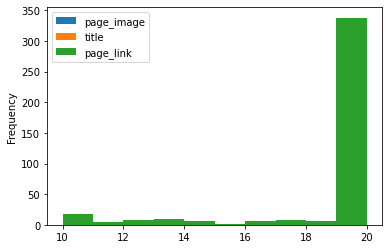

In [81]:
check.groupby('name').count().plot.hist()

In [82]:
check

,name,page_image,title,page_link
0,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,37화,https://comic.naver.com/webtoon/detail?titleId...
1,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,38화,https://comic.naver.com/webtoon/detail?titleId...
2,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,39화,https://comic.naver.com/webtoon/detail?titleId...
3,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,40화,https://comic.naver.com/webtoon/detail?titleId...
4,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,41화,https://comic.naver.com/webtoon/detail?titleId...
...,...,...,...,...
7354,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,6화,https://comic.naver.com/webtoon/detail?titleId...
7355,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,7화,https://comic.naver.com/webtoon/detail?titleId...
7356,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,8화,https://comic.naver.com/webtoon/detail?titleId...
7357,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,9화,https://comic.naver.com/webtoon/detail?titleId...
